# Basketball Trend Analysis

In this analysis we'll analyze salary and various other in-game metrices for the top-10 highest paid NBA basketball players from the year 2005 to 2014. The primary focus of this analysis would be to analyze the trend of these metrices. 

We'll also deep-dive into the data and create additional metrics to get better insight.

## Exploring Dataset

Let's explore the dataset that we have to understand the variables in a better way.

### Importing Libraries & Settings

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,5

### Importing Data

In [2]:
basketball_data = pd.read_csv("../02_DATA/basketball_players_data.csv", index_col="RowID")
basketball_data.head()

,Player,Measure,Year,Values
RowID,,,,
0,Kobe Bryant,Salary,2005,15946875
1,Joe Johnson,Salary,2005,12000000
2,LeBron James,Salary,2005,4621800
3,Carmelo Anthony,Salary,2005,3713640
4,Dwight Howard,Salary,2005,4493160


### Data Profiling

In [3]:
# Viewing the shape of data

basketball_data.shape

(600, 4)

In [4]:
# Viewing the metadata info

basketball_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Player   600 non-null    object
 1   Measure  600 non-null    object
 2   Year     600 non-null    int64 
 3   Values   600 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 23.4+ KB


In [5]:
# List of unique players

list(basketball_data["Player"].unique())

['Kobe Bryant',
 'Joe Johnson',
 'LeBron James',
 'Carmelo Anthony',
 'Dwight Howard',
 'Chris Bosh',
 'Chris Paul',
 'Kevin Durant',
 'Derrick Rose',
 'Dwayne Wade']

In [6]:
# List of unique measures

list(basketball_data["Measure"].unique())

['Salary',
 'Games Played',
 'Minutes Played',
 'Field Goals',
 'Field Goal Attempts',
 'Points']

In [7]:
# List of unique years

list(basketball_data["Year"].unique())

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

### Filtering the DataFrame

We can slice the dataframe to view a certain player's data on a particular year.

In [8]:
basketball_data.dtypes

Player     object
Measure    object
Year        int64
Values      int64
dtype: object

#### Viewing Joe Johnson's Goals in the year 2009

In [9]:
measure_filter = "Field Goals"
player_filter = "Joe Johnson"
year_filter = 2009

filter_1 = basketball_data["Measure"] == measure_filter
filter_2 = basketball_data["Player"] == player_filter
filter_3 = basketball_data["Year"] == year_filter

combined_filter = (filter_1) & (filter_2) & (filter_3)

filtered_data = basketball_data[combined_filter]

filtered_data.iloc[0]

Player     Joe Johnson
Measure    Field Goals
Year              2009
Values             635
Name: 271, dtype: object

### Creating a function to filter the dataframe

In [10]:
def player_year_metric_value(metric_name: str, player_name: str, year: int):
    
    filter_1 = basketball_data["Measure"] == metric_name
    filter_2 = basketball_data["Player"] == player_name
    filter_3 = basketball_data["Year"] == year

    combined_filter = (filter_1) & (filter_2) & (filter_3)

    filtered_data = basketball_data[combined_filter]

    return filtered_data.iloc[0]

#### Viewing Salary of Kobe Bryant in the year 2010

In [11]:
player_year_metric_value("Salary", "Kobe Bryant", 2010)

Player     Kobe Bryant
Measure         Salary
Year              2010
Values        24806250
Name: 300, dtype: object

#### Viewing Fields Goal of Kevin Durant in the year 2013

In [12]:
player_year_metric_value("Field Goals", "Kevin Durant", 2013)

Player     Kevin Durant
Measure     Field Goals
Year               2013
Values              849
Name: 517, dtype: object

## Visualizing Data

Visualizing the dataset provides a better way to analyze the data and we can leverage the `matplotlib` library to effectively visualize the data to get valuable insights

#### Kobe Bryant Salary Trend

The below chart shows Kobe Bryant's salary trend from 2005 to 2014

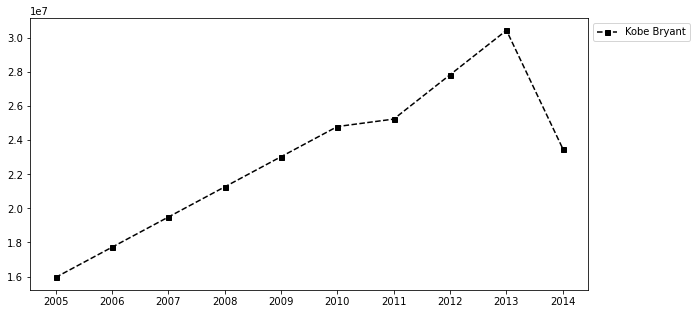

In [13]:
measure_filter = "Salary"

# Preparing data for Kobe Bryant

player_filter = "Kobe Bryant"

combined_filter = (basketball_data["Measure"] == measure_filter) & (basketball_data["Player"] == player_filter)

filtered_data = basketball_data[combined_filter]

grouped_data = filtered_data.groupby(["Year"]).sum()

y_axis = list(grouped_data["Values"])
x_axis = list(grouped_data.index)

# Plotting the chart

plt.plot(x_axis, y_axis, c="black", ls="--", marker="s", ms=5, label=player_filter)

plt.xticks(x_axis)
plt.legend(loc="upper left", bbox_to_anchor=[1,1])
plt.show()

##### 💡 Insight
- Over the year; Kobe's salary trended upwards however, we can see a drastic dip in the year 2014 and this is because of his injuries happened to him in the games on his prior matches for which he couldn't able to play more matches

#### Comparing Kobe Bryant Salary Trend with that of Joe Johnson

The following chart compares the salaries of Kobe Bryant wit Joe Johnson over the years

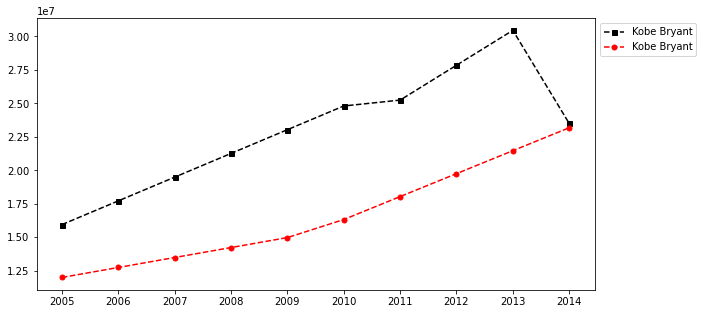

In [14]:
measure_filter = "Salary"

# Preparing data for Kobe Bryant

player_filter_kb = "Kobe Bryant"

combined_filter_kb = (basketball_data["Measure"] == measure_filter) & (basketball_data["Player"] == player_filter_kb)

filtered_data_kb = basketball_data[combined_filter_kb]

grouped_data_kb = filtered_data_kb.groupby(["Year"]).sum()

y_axis_kb = list(grouped_data_kb["Values"])
x_axis_kb = list(grouped_data_kb.index)

# Preparing data for Joe Johnson

player_filter_jj = "Joe Johnson"

combined_filter_jj = (basketball_data["Measure"] == measure_filter) & (basketball_data["Player"] == player_filter_jj)

filtered_data_jj = basketball_data[combined_filter_jj]

grouped_data_jj = filtered_data_jj.groupby(["Year"]).sum()

y_axis_jj = list(grouped_data_jj["Values"])
x_axis_jj = list(grouped_data_jj.index)

# Plotting the chart

plt.plot(x_axis_kb, y_axis_kb, c="black", ls="--", marker="s", ms=5, label=player_filter_kb)
plt.plot(x_axis_jj, y_axis_jj, c="red", ls="--", marker="o", ms=5, label=player_filter_kb)

plt.xticks(x_axis_kb)

plt.legend(loc="upper left", bbox_to_anchor=[1,1])
plt.show()

##### 💡 Insight
- Over the year; Joe Johnson salary remained lower than that of Kobe Bryant's.
- Joe's salary trended upwards as the year progresses and it seems that the salary equation might change in the future years.

### Creating functions to visualize & compare multiple players by a measure

In [15]:
players = list(basketball_data['Player'].unique())
years = list(basketball_data['Year'].unique())

players_color = {
    "Kobe Bryant":"black",
    "Joe Johnson":"red",
    "LeBron James": "blue",
    "Carmelo Anthony":"green",
    "Dwight Howard":"gold",
    "Chris Bosh":"chocolate",
    "Chris Paul":"lightseagreen",
    "Kevin Durant":"magenta",
    "Derrick Rose":"darkorange",
    "Dwayne Wade":"teal"
}

players_marker = {
    "Kobe Bryant":"s",
    "Joe Johnson":"o",
    "LeBron James":"*",
    "Carmelo Anthony":"h",
    "Dwight Howard":"D",
    "Chris Bosh":"X",
    "Chris Paul":"p",
    "Kevin Durant":"P",
    "Derrick Rose":"1",
    "Dwayne Wade":"."
}

def singe_metric_compare(measure_name: str, player_names = players):
    for p in player_names:
        combined_filter = (basketball_data["Measure"] == measure_name) & (basketball_data["Player"] == p)
        filtered_data = basketball_data[combined_filter]
        grouped_data = filtered_data.groupby(["Year"]).sum()

        y_axis = list(grouped_data["Values"])
        x_axis = list(grouped_data.index)
        
        plt.plot(x_axis, y_axis, c=players_color[p], ls="--", marker=players_marker[p], ms=5, label=p)
        
    plt.xticks(x_axis)
    plt.legend(loc="upper left", bbox_to_anchor=[1,1])
    plt.show()
    return

def derived_metric_compare(measure_name: list, player_names = players):
    for p in player_names:
        combined_filter_0 = (basketball_data["Measure"] == measure_name[0]) & (basketball_data["Player"] == p)
        filtered_data_0 = basketball_data[combined_filter_0]
        grouped_data_0 = filtered_data_0.groupby(["Year"]).sum()
        
        combined_filter_1 = (basketball_data["Measure"] == measure_name[1]) & (basketball_data["Player"] == p)
        filtered_data_1 = basketball_data[combined_filter_1]
        grouped_data_1 = filtered_data_1.groupby(["Year"]).sum()
        
        array_0 = np.array(list(grouped_data_0["Values"]))
        array_1 = np.array(list(grouped_data_1["Values"]))
        
        y_axis = list(array_0 / array_1)
        x_axis = list(grouped_data_0.index)
        
        plt.plot(x_axis, y_axis, c=players_color[p], ls="--", marker=players_marker[p], ms=5, label=p)
        
    plt.xticks(x_axis)
    plt.legend(loc="upper left", bbox_to_anchor=[1,1])
    plt.show()
    return

## Analyzing Data

We can analyze the basketball data of the top-10 highest players from 2005-14 in three facets by leveraing the `singe_metric_compares()` and `derived_metric_compare()` functions:

- Analyzing Salary Statistics
- Analyzing In-Game Statistics
- Analyzing Normalized In-Game Statistics

### Analyzing Salary Statistics

Let's analyze the salary of player and compare it with some of the in-game metrics.

#### Analyzing Salary Trend

The following visual analyzes the salary trend of all the players

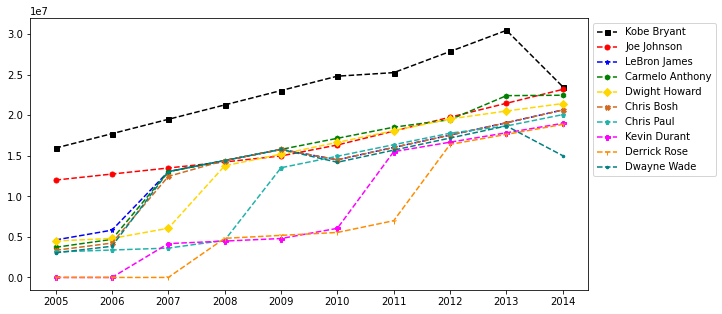

In [16]:
singe_metric_compare("Salary")

##### 💡 Insight
- Kobe Bryant topped the list when it comes to salary and in 2013; his record was over 30 million dollars per annum
- In 2014; Kobe's salary saw a massive dip and rest of players seems to caught up with him
- Like Kobe Bryantl Dwayne Wade's salary has also seen a massive dip in 2014 whereas; salaries of rest all the players trended upwards over the years

#### Analyzing Salary per Game & Salary per Field Goal Trend

The following visuals analyzes the "salary per game" and "salary per field goal" trend all the players, respectively.

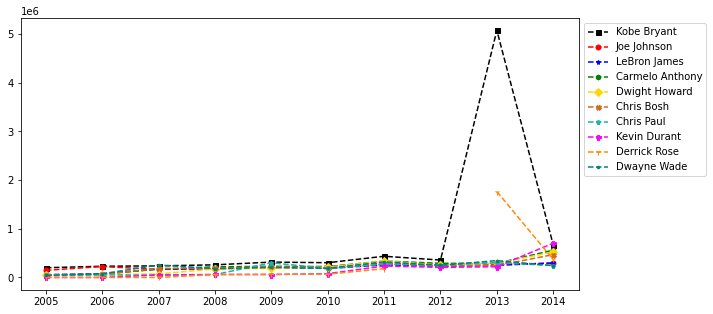

In [17]:
derived_metric_compare(["Salary", "Games Played"])

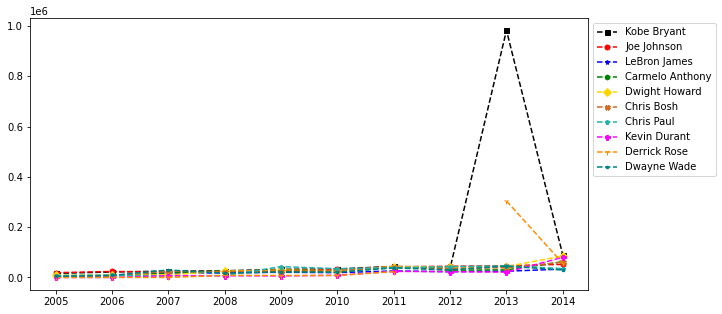

In [18]:
derived_metric_compare(["Salary", "Field Goals"])

##### 💡 Insight
- The visualizations seems anomalous because Kobe Bryant and Derrick Rose got injured during 2012-2014 and when their salary remain more or, less same because of contracts but, the number of games played and number of goals made decreased.

So, comparaing salary and in-game statistics can lead to anomalous results because of injury & less game playing issues.

### Analyzing In-Game Statistics

#### Analyzing Games Played

The following visual shows the number of games played by players over the years

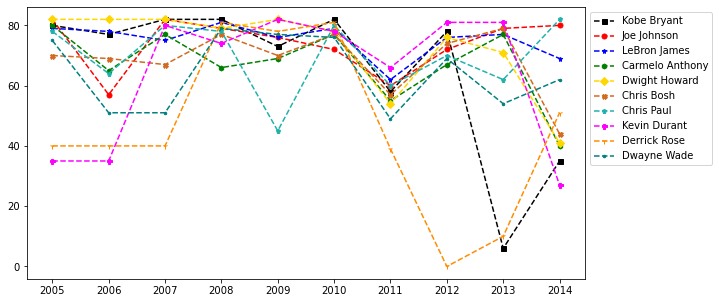

In [19]:
singe_metric_compare("Games Played")

##### 💡 Insight
- The visualization clearly shows a sharp decrease in number of games played by Kobe Bryant and Derrick Rose in between 2012-14 because of injuries.
- The number of games played by other players is pretty consistent and varies between 60-80 over the years without any significant or, sudden fall

#### Analyzing Minutes Played and Points Trend

The following two charts shows the trend of players on the basis of "minutes played" and "points made", respectively

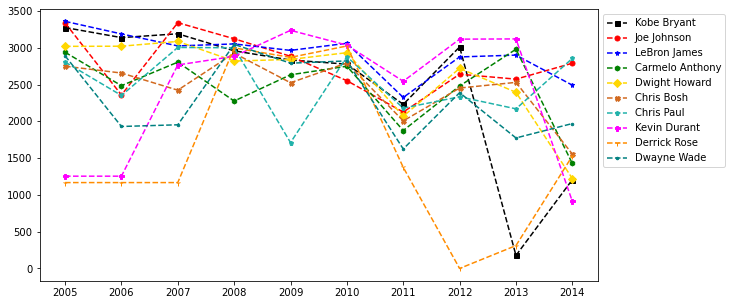

In [20]:
singe_metric_compare("Minutes Played")

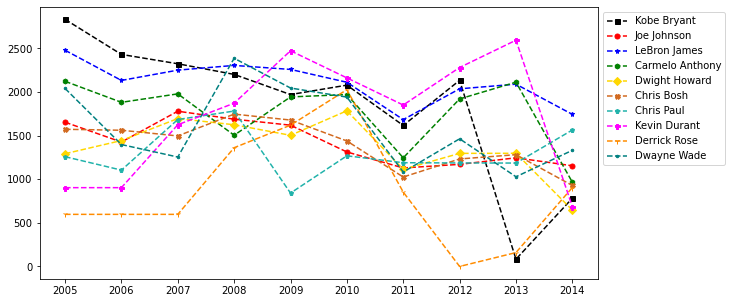

In [21]:
singe_metric_compare("Points")

##### 💡 Insight
- The visualization clearly shows a sharp decrease in minutes played and points made  by Kobe Bryant and Derrick Rose in between 2012-14 because of injuries.

To avoid discrepancies caused by injuries; we can normalize the measures by dividing the in-game matrices

### Analyzing Normalized In-Game Statistics

#### Analyzing Field Goals per Game, Goal Accuracy Trend

The following visuals analyzes the "Goals made per Game" and "Goal Accuracy" respectively

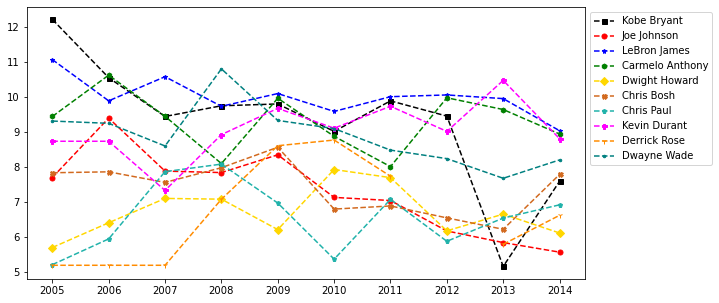

In [22]:
derived_metric_compare(["Field Goals", "Games Played"])

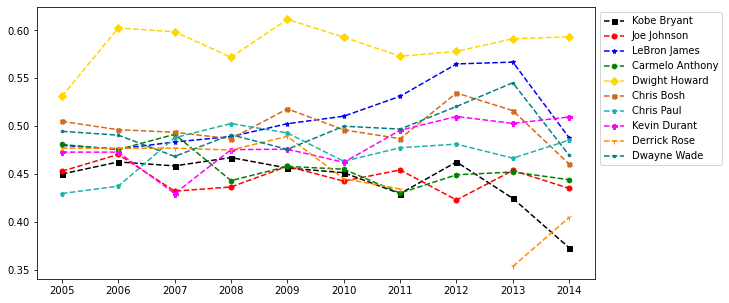

In [23]:
derived_metric_compare(["Field Goals", "Field Goal Attempts"])

##### 💡 Insight
- Dwight Howard tops the list over the years in goal accuracy and over the years he maintained a accuracy between 55-60%; however, the goals made by him per game is not high enough and ranges between 6-8 over the years
- We can still see the effect of injuries on Kobe Bryant & Derrick Rose and this is because of the number of games played by those players.
- Kobe Bryant has made significant amount of goals per game before 2012 that ranges between 9-13

#### Analyzing Field Goal Attempts per Game, Points per Game Trend

The following visuals analyzes the "Field Goal Attempts per Game" and "Points per Game" respectively

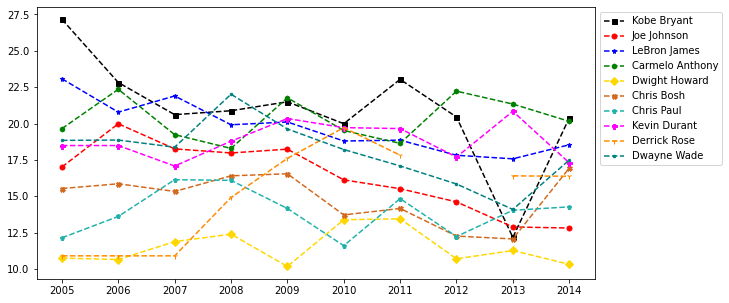

In [24]:
derived_metric_compare(["Field Goal Attempts", "Games Played"])

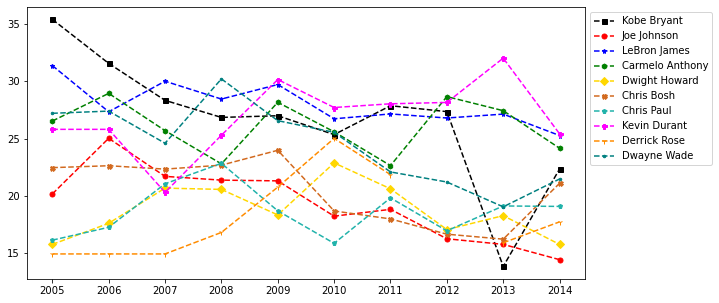

In [25]:
derived_metric_compare(["Points", "Games Played"])

##### 💡 Insight
- Although Dwight Howard has a very good goal accuracy but; the "Field Goal Attempts per Game" trend shows that, he is at the bottom; therefore in the "Points per Game" trend also; his statistics decreased over the years.

#### Analyzing Minutes Player per Game and Field Goals per Minutes Played

The following visual shows; how much time players spent per game over the years and how well they are able to utilize that time in terms of making points

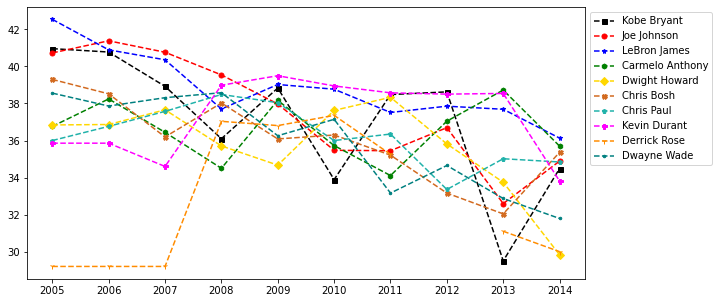

In [26]:
derived_metric_compare(["Minutes Played", "Games Played"])

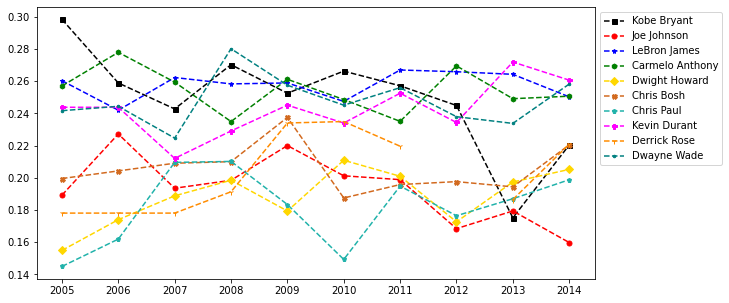

In [27]:
derived_metric_compare(["Field Goals", "Minutes Played"])

##### 💡 Insight
- We can see a overall decrease in the minutes played per game for almost all the players whereas; the number of games played by them remained pretty much consistent as per our initial observation.
- Kevin Durant seems to utilize much of his time in making goals and over the years we can see a increasing trend for him in "field goals per minutes played" chart
- We can also obeserve two groups in the "field goals per minutes played" chart. In one group we have Kevin Durant, LeBron James, Carmelo Anthony & Dwayne Wade and over the time they have increased their field goals per minute played whereas the rest of the players underformed and fall in a second group

#### Analyzing Points per Field Goal

In the following visualization we have analyzed how much points the players are gathering per goal

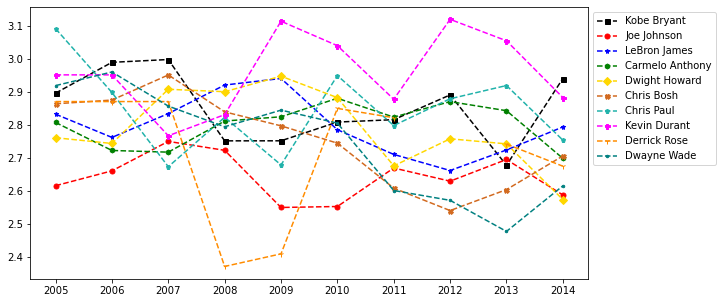

In [28]:
derived_metric_compare(["Points","Field Goals"])

##### 💡 Insight
- This particular visualization represents what style the plyaer follows,i.e., are they trying to make more points per goal or, not.
- We can observe; the average points per goal seems to concentrated around 2.9 that shows, players are trying to make most points per goal.

The field goals we are observing also includes the free shots that a player gets when the opponent team makes a foul.